## 将鸢尾花数据集分类树可视化

In [5]:
#导入库
import lightgbm as lgb
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score

In [20]:
# 导入鸢尾花数据集
iris = load_iris()
target = iris.target
feature_names = ["calyx length", "calyx width", "petal length", "petal width"]
data = pd.DataFrame(iris.data, columns=feature_names)
data

,calyx length,calyx width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
#将iris划分为训练集和测试机
train_data_all,test_data, train_y_all, test_y = TTS(data, target, test_size=0.2, random_state=42, shuffle=True)
train_data, val_data, train_y, val_y = TTS(train_data_all, train_y_all, test_size=0.2, random_state=42, shuffle=True)

#构建LGB的训练集
lgb_train = lgb.Dataset(train_data, train_y)
lgb_val = lgb.Dataset(val_data, val_y)

#设置模型参数
params = {
    "objective":"multiclass",
    "num_classes":3,
    "verbosity":-1
}
# 训练模型
booster = lgb.train(params, train_set=lgb_train, valid_sets=lgb_val, num_boost_round=12)

#使用训练的模型对iris进行预测
train_preds = np.argmax(booster.predict(train_data), axis=1)
test_preds = np.argmax(booster.predict(test_data), axis=1)
#测试结果
print("Train Accuracy Score: %.2f"%accuracy_score(train_y, train_preds))
print("Test Accuracy Score: %.2f"%accuracy_score(test_y, test_preds))

[1]	valid_0's multi_logloss: 0.998257
[2]	valid_0's multi_logloss: 0.87888
[3]	valid_0's multi_logloss: 0.802809
[4]	valid_0's multi_logloss: 0.723778
[5]	valid_0's multi_logloss: 0.65558
[6]	valid_0's multi_logloss: 0.60953
[7]	valid_0's multi_logloss: 0.553635
[8]	valid_0's multi_logloss: 0.499817
[9]	valid_0's multi_logloss: 0.471947
[10]	valid_0's multi_logloss: 0.438747
[11]	valid_0's multi_logloss: 0.404308
[12]	valid_0's multi_logloss: 0.387417
Train Accuracy Score: 0.96
Test Accuracy Score: 0.97


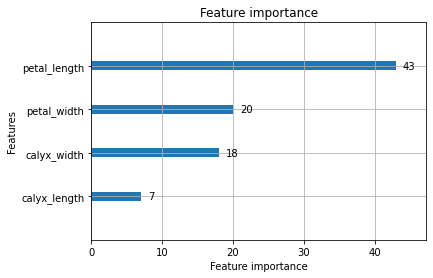

In [22]:
ax = lgb.plot_importance(booster)
plt.show;

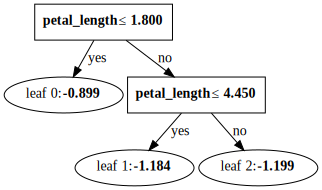

In [28]:
lgb.create_tree_digraph(booster, tree_index=0,orientation='vertical')

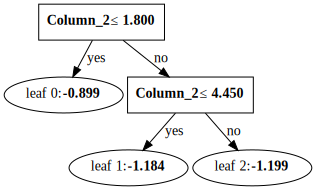

In [29]:
## 读取任务2中的json格式模型文件
import pickle
model_pickle = pickle.load(open('model.pickle','rb'))
lgb.create_tree_digraph(model_pickle, tree_index=0,orientation='vertical')